In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
del df['Unnamed: 0']

Важно! В данных небольшая выборка. Она не отражает реальность IT сферы. Поэтому нельзя использовать этот Dataset для вывода статистических данных по отрасли. НО! Он идеально подходит новичкам для тренировок, так как содержит множество показателей и зависимостей, которые можно вывести.

In [4]:
df.shape

(607, 11)

In [5]:
df = df.rename(columns={'job_title': 'job'})

Оставляю только 4 профессии, так как в других недостаточно большая выборка

In [6]:
list_ds = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']
df = df.query('job in @list_ds')

In [67]:
df.head(5)

,work_year,experience_level,employment_type,job,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S


Сделаю подсчет разных значений по колонкам, чтобы понимать, каких данных больше и их в дальнейшем использовать

In [7]:
df.job.value_counts()

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Name: job, dtype: int64

In [8]:
df.experience_level.value_counts()

SE    198
MI    154
EN     55
EX      6
Name: experience_level, dtype: int64

In [9]:
df.company_location.value_counts().head(4)

US    256
GB     39
DE     16
IN     14
Name: company_location, dtype: int64

Посмотрим в какой стране наиболее высокие зарплаты средние зарплаты в Data Science у Middle специалистов

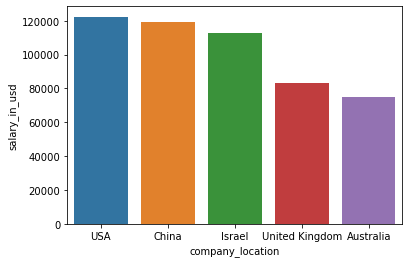

In [24]:
ds_salaries = df.query('job== "Data Scientist" & employment_type == "FT" & experience_level == "MI"') \
  .groupby(['job', 'company_location'], as_index=False) \
  .agg({'salary_in_usd': 'mean'}) \
  .sort_values('salary_in_usd', ascending=False).head()

g = sns.barplot(data=ds_salaries, x='company_location', y = 'salary_in_usd')
g.set(xticklabels=["USA", "China", "Israel", 'United Kingdom', 'Australia']);

Проверим, если ли какая-то корреляция/зависимость между страной происхождения человека и его зарплатой в США

In [15]:
df_middles_ds = df.query('experience_level == "MI" & job == "Data Scientist" & company_location == "US" & \
                            employment_type == "FT"')

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

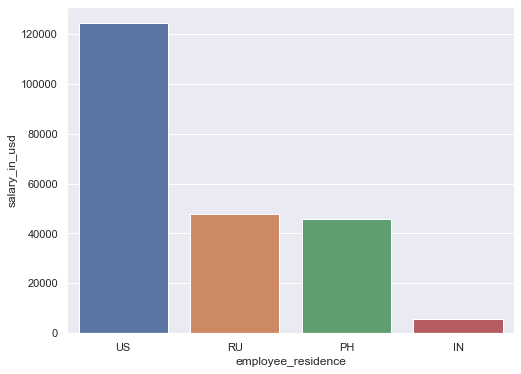

In [69]:
salary_of_emp_countries = df_middles_ds \
    .groupby('employee_residence', as_index=False) \
    .agg({'salary_in_usd': 'mean'}) \
    .sort_values('salary_in_usd', ascending=False)

sns.barplot(data=salary_of_emp_countries, x='employee_residence', y='salary_in_usd')


Узнаем, есть ли какая-то разница между зарплатами в разных по размеру компаниях у Data Scientists

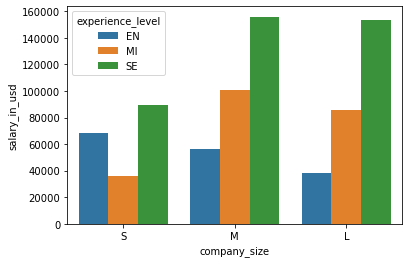

In [24]:
salaries_of_company = df.query('experience_level != "EX" & job == "Data Scientist"') \
                        .groupby(['company_size', 'experience_level'], as_index = False) \
                        .agg({'salary_in_usd': 'mean'})

sns.barplot(x="company_size", y="salary_in_usd", hue="experience_level", data=salaries_of_company, order=["S", "M", "L"]);

Проверим, есть ли какая-то разница между зарплатами тех, кто работает на удаленке и в офисе.

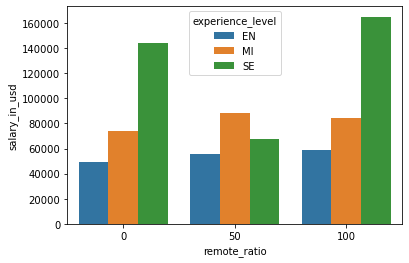

In [26]:
salaries_of_remote = df.query('experience_level != "EX" & job == "Data Scientist"') \
                        .groupby(['remote_ratio', 'experience_level'], as_index = False) \
                        .agg({'salary_in_usd': 'mean'})

sns.barplot(x="remote_ratio", y="salary_in_usd", hue="experience_level", data=salaries_of_remote);


Сделаем график по разным профессиям и узнаем, где больше всего получают специалисты разных уровней.

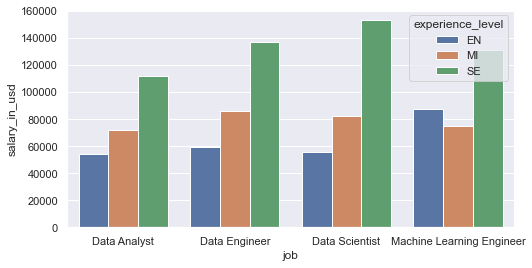

In [52]:
salaries_of_professions = df.query('experience_level != "EX"') \
                            .groupby(['job', 'experience_level'], as_index=False) \
                            .agg({'salary_in_usd': 'mean'})

g = sns.barplot(x='job', y='salary_in_usd', hue='experience_level', data=salaries_of_professions)
g = sns.set(rc={'figure.figsize':(9,4)})
g

Очень интересно посмотреть как менялись зарплаты у Data Scientists с 2020 по 2022 года. Сделаем для этого график.

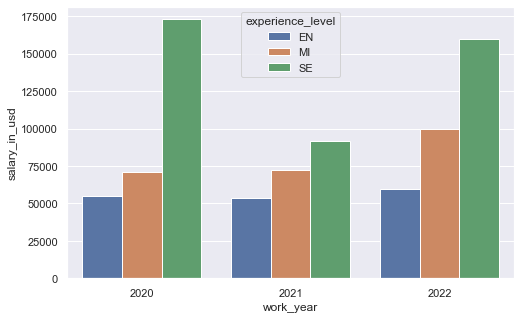

In [65]:
salaries_of_years = df.query('experience_level != "EX" & job == "Data Scientist"') \
                      .groupby(['work_year', 'experience_level'], as_index=False) \
                      .agg({'salary_in_usd': 'mean'})
sns.barplot(x='work_year', y='salary_in_usd', hue='experience_level', data=salaries_of_years)
sns.set(rc={'figure.figsize':(8,6)})



В пандемию увеличилось количество людей, которые работают удаленно. Давайте отразим это на графике.

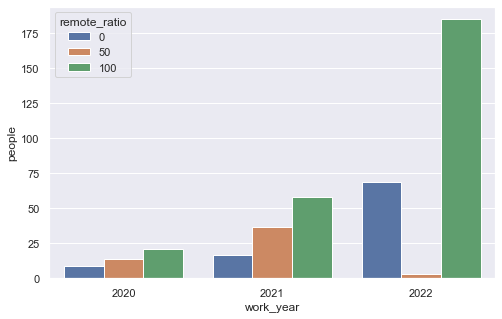

In [64]:
people_on_remote = df.groupby(['work_year', 'remote_ratio'], as_index=False) \
                     .agg({'experience_level': 'count'}) \
                     .rename(columns={'experience_level': 'people'})


sns.barplot(x='work_year', y='people', hue='remote_ratio', data=people_on_remote);